# Compare different lifetime fits 

### JAH 04/08/18

<i>
This NB shows the comparison between different fits (binned and un-binned) lifetime fits with data
</i>

In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Sat Aug  4 22:33:41 2018


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Notebook configuration

In [3]:
run_number                 = 6206
input_dst_filenames        = [f"$IC_DATA/dsts/kdst_{run_number}_0_filtered.h5"]
run_number_correction      = 6206
correction_filename        = f"$IC_DATA/maps/corrections_run{run_number_correction}.h5"

### Imports

In [4]:
import os
import time
import random

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt

import scipy.stats       as stats

import invisible_cities.core.fit_functions as fitf
import invisible_cities.reco.dst_functions as dstf
import invisible_cities.io  .kdst_io       as kdstio

from invisible_cities.core .core_functions import in_range

import krcal.core.fit_functions         as icarofitf
import krcal.utils.hst_extend_functions as hst
import krcal.utils.plt_functions        as apt
import krcal.utils.kdst_functions       as kdstf
import krcal.dev.akr_functions          as akr
import krcal.dev.corrections            as corrections

from   invisible_cities.evm  .ic_containers  import Measurement

In [5]:
# Plotting style
import matplotlib as mpl

default_cmap = "jet"
mpl.rcParams['figure.figsize']  = 10, 8
mpl.rcParams['font.size']    = 14


In [6]:
Rrange = (0., 180.)
Zrange = (0., 550.)

### Initialization

In [7]:
input_dst_filenames = [os.path.expandvars(fi) for fi in input_dst_filenames]
correction_filename = os.path.expandvars(correction_filename)

In [8]:
dst = kdstf.load_dsts(input_dst_filenames, "DST", "Events")


## Read data

In [9]:
#dst           = dstf.load_dst(input_dst_filename, "DST", "Events")
unique_events = ~dst.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 1164523 
Total number of events: 1164523


## Relevant data and corrections

In [10]:
X   = dst.X   .values
Y   = dst.Y   .values
Z   = dst.Z   .values
R   = dst.R   .values
S2e = dst.S2e .values
S2q = dst.S2q .values
T   = dst.time.values

In [11]:
calibrate = corrections.Calibration(correction_filename)

E, Q = calibrate(X, Y, Z, T, S2e, S2q)

calibration file : /Users/hernando/investigacion/NEXT/data/runIV//maps/corrections_run6206.h5
node             : geometry


## Comparison with data

In [12]:
sel_r = in_range(R, *Rrange)
sel_z = in_range(Z, *Zrange)

sel = sel_r & sel_z

In [13]:
XYa = hst.Vaxis( (-200, 200), 40)
axye0, axylt, axychi2, aok = akr.ltmap_lsqfit(X[sel], Y[sel], Z[sel], S2e[sel], XYa.bins)

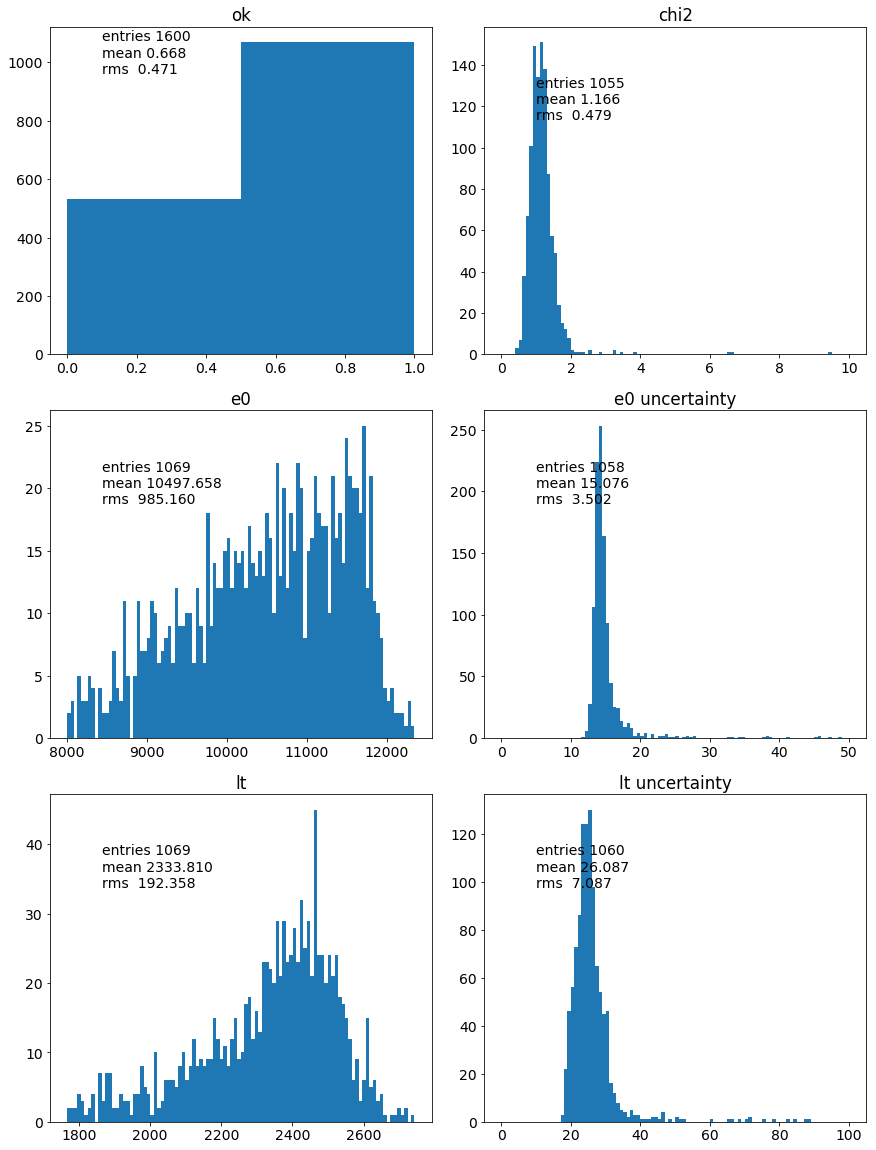

In [14]:
c = hst.Canvas(3, 2)
hst.hist(aok.flatten()                         ,   2, canvas = c(1), title = 'ok' )
hst.hist(axychi2[aok].flatten()                , 100, (0., 10), canvas = c(2), title = 'chi2');
hst.hist(axye0.value[aok].flatten()            , 100, canvas = c(3), title = 'e0');
hst.hist(axye0.uncertainty[aok].flatten()      , 100, (0., 50), canvas = c(4), title = 'e0 uncertainty');
hst.hist(axylt.value[aok].flatten()            , 100, canvas = c(5), title='lt');
hst.hist(axylt.uncertainty[aok].flatten()      , 100, (0,  100), canvas = c(6), title='lt uncertainty')
plt.tight_layout()

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6497: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


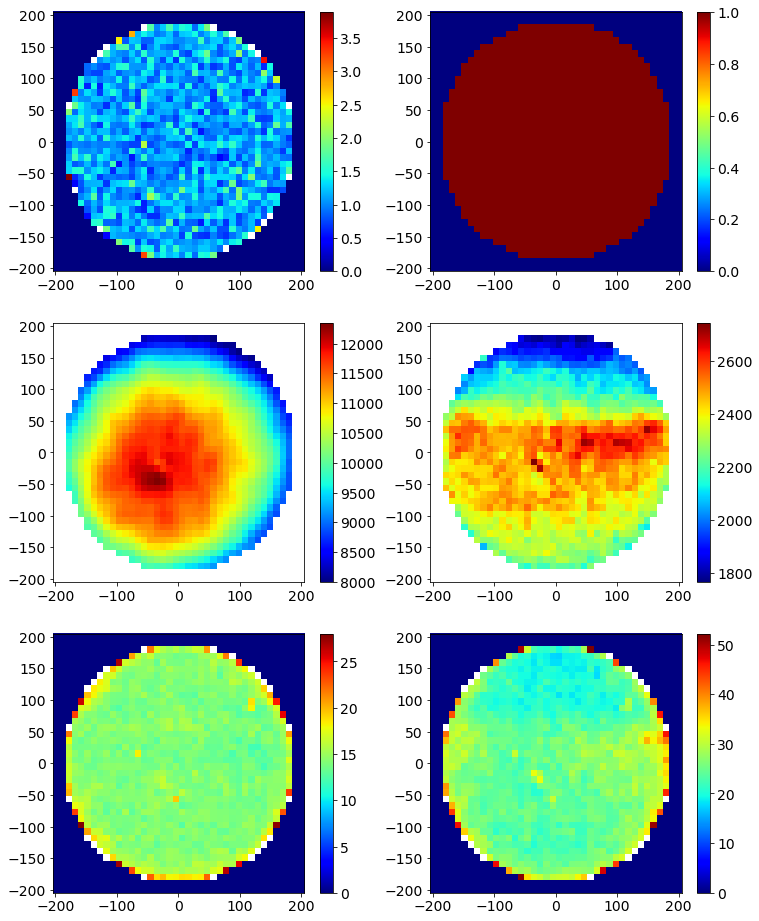

In [15]:
#print((cc[0].value))
c = hst.Canvas(3, 2)
hst.display_matrix(XYa.centers, XYa.centers, axychi2    , cmin = 0.   , cmax = 6.   , cmap='jet', canvas=c(1));
hst.display_matrix(XYa.centers, XYa.centers, aok                                    , cmap='jet', canvas=c(2));
hst.display_matrix(XYa.centers, XYa.centers, axye0.value, cmin = 7.5e3, cmax = 13e3 , cmap='jet', canvas=c(3));
hst.display_matrix(XYa.centers, XYa.centers, axylt.value, cmin = 1500 , cmax = 2800., cmap='jet', canvas=c(4));
hst.display_matrix(XYa.centers, XYa.centers, axye0.uncertainty, cmin = 0, cmax = 30., cmap='jet', canvas=c(5));
hst.display_matrix(XYa.centers, XYa.centers, axylt.uncertainty, cmin = 0, cmax = 60., cmap='jet', canvas=c(6));
#plt.tight_layout()

In [16]:
Znbins, Zrange = 22, (0., 550.)
bxye0, bxylt, bxychi2, bok = akr.ltmap(X[sel], Y[sel], Z[sel], S2e[sel], XYa.bins, Znbins, Zrange)

/Users/hernando/investigacion/NEXT/work/KrCalib/krcal/core/fit_functions.py:77: RuntimeWarning: invalid value encountered in greater
  valid_points = yu > 0


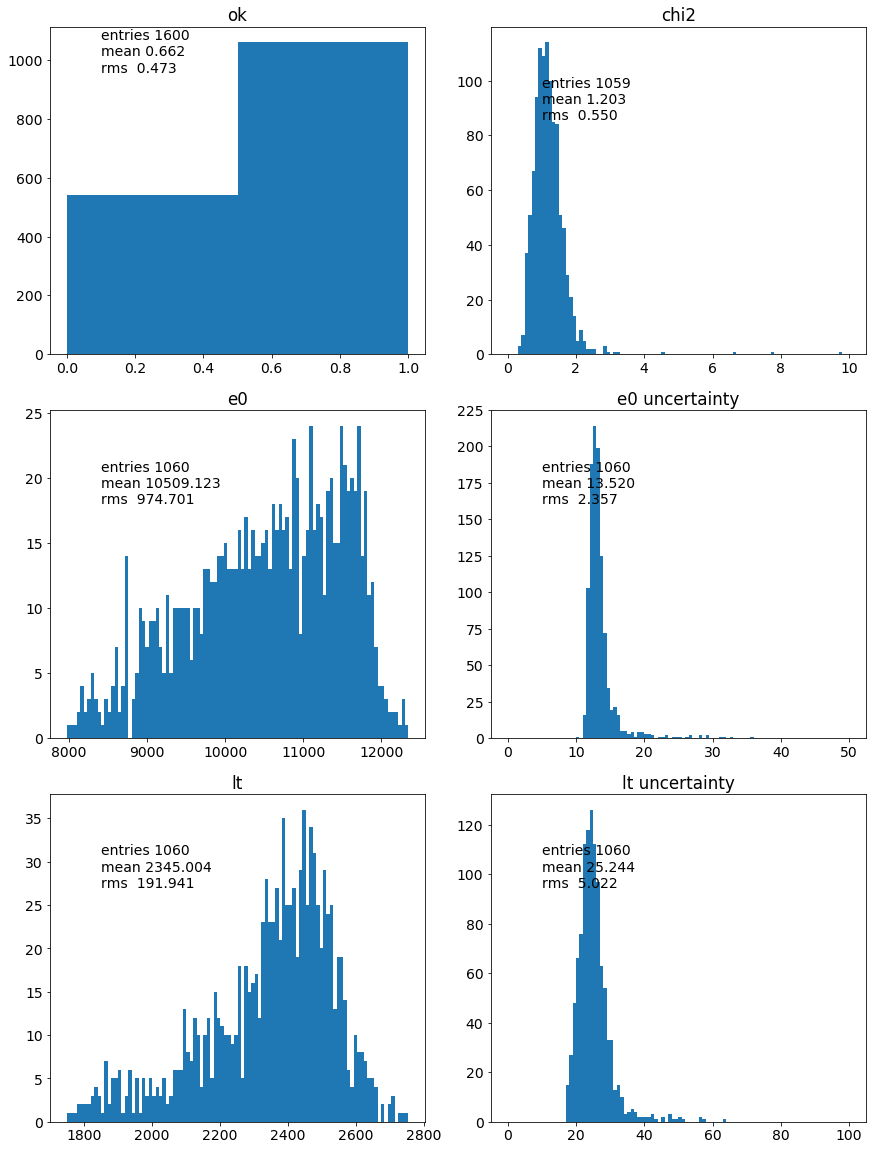

In [17]:
c = hst.Canvas(3, 2)
hst.hist(bok.flatten()                         ,   2, canvas = c(1), title = 'ok' )
hst.hist(bxychi2[bok].flatten()                , 100, (0., 10), canvas = c(2), title = 'chi2');
hst.hist(bxye0.value[bok].flatten()            , 100, canvas = c(3), title = 'e0');
hst.hist(bxye0.uncertainty[bok].flatten()      , 100, (0., 50), canvas = c(4), title = 'e0 uncertainty');
hst.hist(bxylt.value[bok].flatten()           , 100, canvas = c(5), title='lt');
hst.hist(bxylt.uncertainty[bok].flatten()      , 100, (0,  100), canvas = c(6), title='lt uncertainty')
plt.tight_layout()

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6497: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


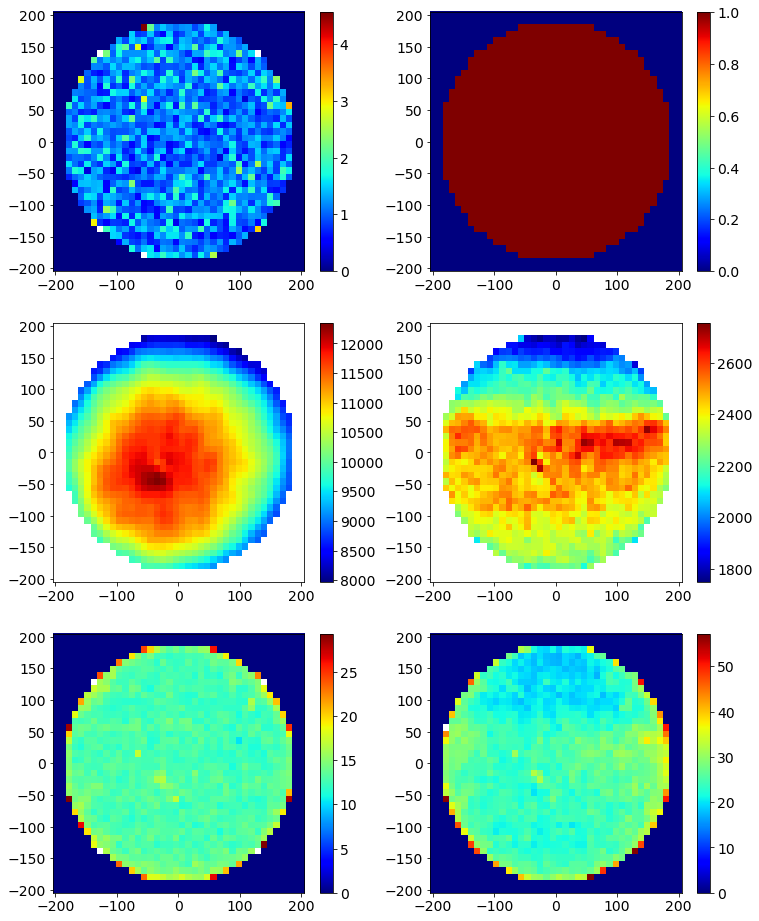

In [18]:
#print((cc[0].value))
c = hst.Canvas(3, 2)
hst.display_matrix(XYa.centers, XYa.centers, bxychi2    , cmin = 0.   , cmax = 6.   , cmap='jet', canvas=c(1));
hst.display_matrix(XYa.centers, XYa.centers, bok                                    , cmap='jet', canvas=c(2));
hst.display_matrix(XYa.centers, XYa.centers, bxye0.value , cmin = 7.5e3, cmax = 13e3 , cmap='jet', canvas=c(3));
hst.display_matrix(XYa.centers, XYa.centers, bxylt.value, cmin = 1500 , cmax = 2800., cmap='jet', canvas=c(4));
hst.display_matrix(XYa.centers, XYa.centers, bxye0.uncertainty, cmin = 0, cmax = 30., cmap='jet', canvas=c(5));
hst.display_matrix(XYa.centers, XYa.centers, bxylt.uncertainty, cmin = 0, cmax = 60., cmap='jet', canvas=c(6));
#plt.tight_layout()

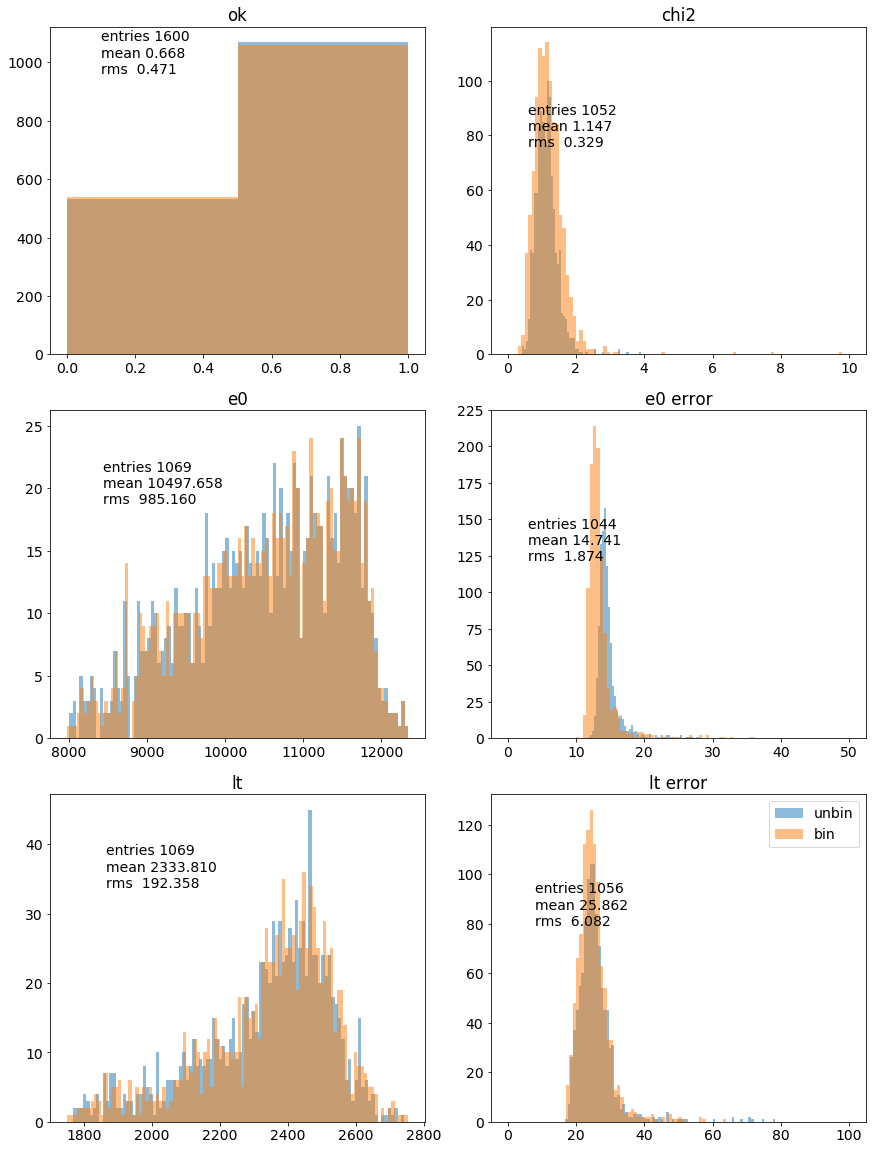

In [19]:
c = hst.Canvas(3, 2)
hst.hist(aok.flatten()                         ,   2, canvas = c(1), title = 'ok', alpha =0.5, label = 'unbin')
hst.hist(axychi2[aok].flatten()                , 100, (0., 6), canvas = c(2), title = 'chi2', alpha=0.5, label = 'unbin');
hst.hist(axye0.value[aok].flatten()            , 100, canvas = c(3), title = 'e0', alpha=0.5, label = 'unbin');
hst.hist(axye0.uncertainty[aok].flatten()      , 100, (0., 30), canvas = c(4), title = 'e0 error', alpha=0.5, label = 'unbin');
hst.hist(axylt.value[aok].flatten()           , 100, canvas = c(5), title='lt', alpha=0.5, label = 'unbin');
hst.hist(axylt.uncertainty[aok].flatten()      , 100, (0,  80), canvas = c(6), title='lt error', alpha=0.5, label = 'unbin')

hst.hist(bok.flatten()                         ,   2, canvas = c(1), alpha=0.5, stats=False, label = 'bin' )
hst.hist(bxychi2[bok].flatten()                , 100, (0., 10), canvas = c(2), alpha=0.5, stats=False, label = 'bin');
hst.hist(bxye0.value[bok].flatten()            , 100, canvas = c(3), alpha=0.5, stats = False, label = 'bin');
hst.hist(bxye0.uncertainty[bok].flatten()      , 100, (0., 50), canvas = c(4), alpha=0.5, stats=False, label = 'bin');
hst.hist(bxylt.value[bok].flatten()           , 100, canvas = c(5), alpha=0.5, stats=False, label = 'bin');
hst.hist(bxylt.uncertainty[bok].flatten()      , 100, (0,  100), canvas = c(6), alpha=0.5, stats = False, label = 'bin')
plt.legend()
plt.tight_layout()

### difference between the lt and e0 maps

In [20]:
# difference between maps
dmap_d, dok = akr.xymap_compare(bxylt, axylt, bok, aok, 'difference')
dmap_r, rok = akr.xymap_compare(bxylt, axylt, bok, aok, 'ratio')

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6497: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


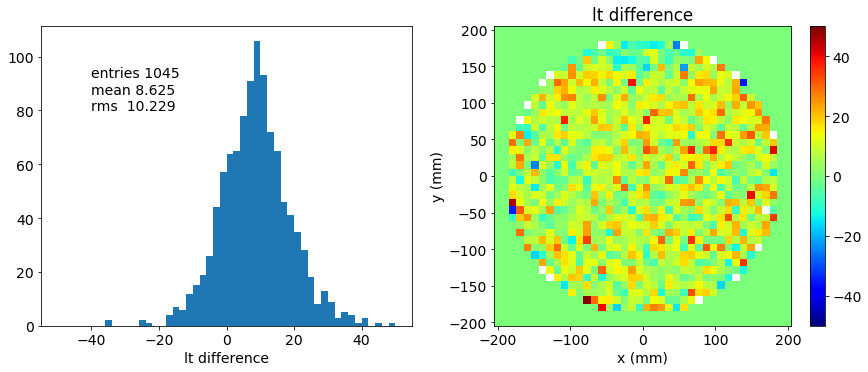

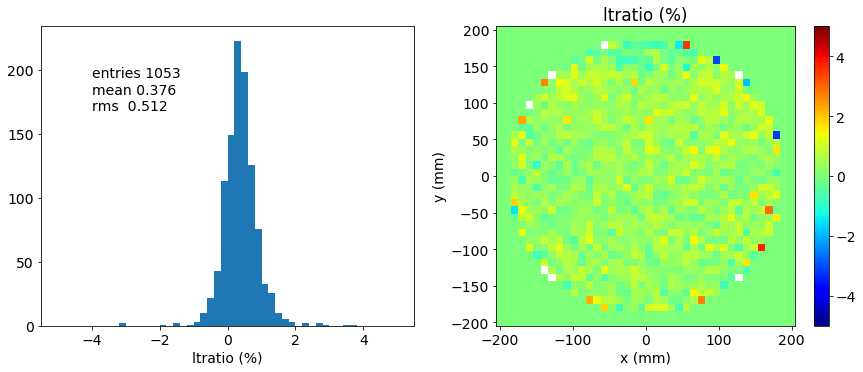

In [21]:
apt.plt_xymap(XYa.centers, XYa.centers, dmap_d.value, dok, 50, (-50, 50.)   , label='lt difference')
apt.plt_xymap(XYa.centers, XYa.centers, dmap_r.value, rok, 50, (-5., 5.), label = 'ltratio (%)');

In [22]:
# difference between maps
dmap_d, dok = akr.xymap_compare(bxye0, axye0, bok, aok, 'difference')
dmap_r, rok = akr.xymap_compare(bxye0, axye0, bok, aok, 'ratio')

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6497: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


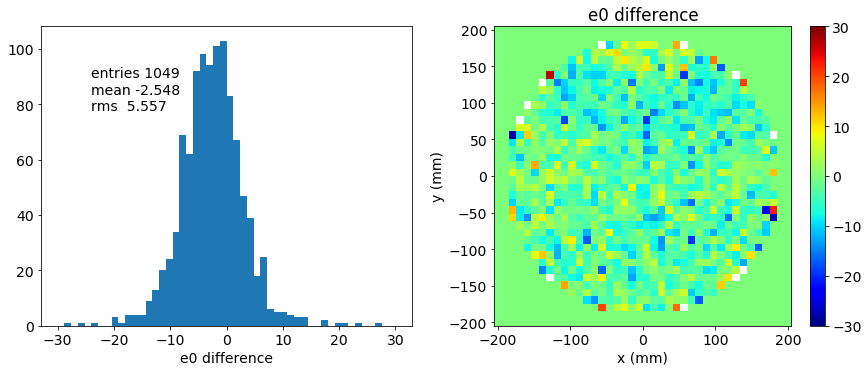

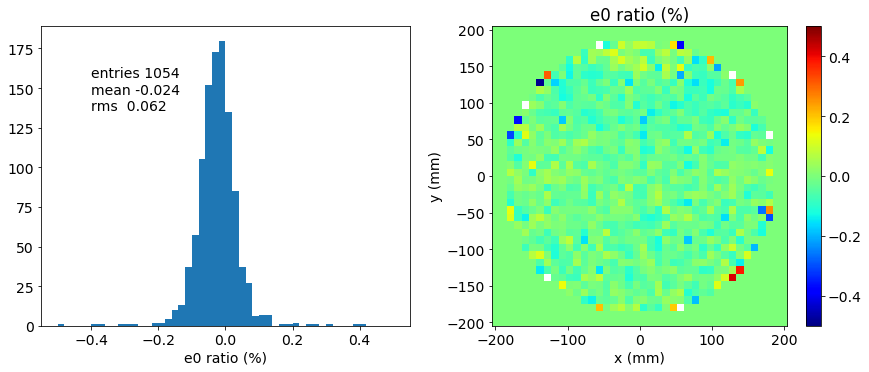

In [23]:
apt.plt_xymap(XYa.centers, XYa.centers, dmap_d.value, dok, 50, (-30, 30.), 'e0 difference')
apt.plt_xymap(XYa.centers, XYa.centers, dmap_r.value, rok, 50, (-0.5, 0.5), 'e0 ratio (%)');

In [24]:
print('Done!')

Done!
